In [153]:
#!pip install h2o
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,55 mins 58 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 8 days
H2O_cluster_name:,H2O_from_python_unknownUser_dl4qlw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.062 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [165]:
data_path = "/content/Call_Data_Small.csv"

df = pd.read_csv(data_path)



,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3
3,6,2009000189345,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1
4,8,2009000189348,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2
...,...,...,...,...,...,...,...,...,...,...,...,...
93897,199987,2009000432273,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,2,WARRANT - MISD WARRANT PICKUP,--WARRANT SERVICES - FELONY,12/16/2009 03:41:36 PM,Dec 16 2009 03:41:36:000PM,NORTH,NORA,N3
93898,199992,2009000432278,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,12/16/2009 03:44:48 PM,Dec 16 2009 03:44:48:000PM,SOUTH,OCEAN,O1
93899,199994,2009000432281,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,"ACC - NON INJURY, BLOCKING",--TRAFFIC - MV COLLISION INVESTIGATION,12/16/2009 03:49:17 PM,Dec 16 2009 03:49:50:000PM,SOUTH,SAM,S2
93900,199995,2009000432282,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,"ACC - NON INJURY, BLOCKING",--TRAFFIC - MV COLLISION INVESTIGATION,12/16/2009 03:50:31 PM,Dec 16 2009 03:53:48:000PM,SOUTH,SAM,S2


In [166]:
df.head()

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3
3,6,2009000189345,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1
4,8,2009000189348,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2


In [167]:
df.isnull().sum().sort_values(ascending=False)

Sector                         597
Beat                             0
Precinct                         0
Arrived Time                     0
Original Time Queued             0
Final Call Type                  0
Initial Call Type                0
Priority                         0
Call Type                        0
Event Clearance Description      0
CAD Event Number                 0
Unnamed: 0                       0
dtype: int64

In [168]:
df['Sector'].fillna(df['Sector'].mode()[0], inplace=True)
df['Beat'].fillna(df['Beat'].mode()[0], inplace=True)
df['Precinct'].fillna(df['Precinct'].mode()[0], inplace=True)
df.isnull().sum().sort_values(ascending=False)

Beat                           0
Sector                         0
Precinct                       0
Arrived Time                   0
Original Time Queued           0
Final Call Type                0
Initial Call Type              0
Priority                       0
Call Type                      0
Event Clearance Description    0
CAD Event Number               0
Unnamed: 0                     0
dtype: int64

In [169]:
#Definir os atributos categóricos e aplicar o label encode 
from sklearn.preprocessing import LabelEncoder
x_to_label = df[['Call Type','Priority','Initial Call Type','Final Call Type',
                       'Precinct','Sector','Beat','Event Clearance Description']]
le = LabelEncoder()
df = x_to_label.apply(le.fit_transform)
#Chamaremos as variávels categóricas normalizadas de x_label
df.reset_index(drop=True,inplace=True)
df


,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,Event Clearance Description
0,6,2,182,281,5,12,58,0
1,4,6,141,245,5,7,36,4
2,6,1,85,42,1,10,51,6
3,6,1,17,112,2,11,52,5
4,4,2,174,42,5,7,37,5
...,...,...,...,...,...,...,...,...
93897,4,1,216,123,1,10,51,6
93898,4,6,187,111,2,11,52,0
93899,6,1,18,112,2,14,67,5
93900,6,1,18,112,2,14,67,6


In [170]:
df.to_csv('/content/df.csv')
data_path = "/content/df.csv"

df = h2o.import_file(data_path)

df

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,Event Clearance Description
0,6,2,182,281,5,12,58,0
1,4,6,141,245,5,7,36,4
2,6,1,85,42,1,10,51,6
3,6,1,17,112,2,11,52,5
4,4,2,174,42,5,7,37,5
5,0,3,123,42,1,6,32,2
6,6,1,150,254,2,11,52,6
7,6,2,176,103,5,2,12,6
8,6,2,130,192,5,12,60,6
9,4,6,175,101,2,13,64,2


In [173]:
y='Event Clearance Description'
x=df.columns
x.remove(y)
x.remove('C1')
x

['Call Type',
 'Priority',
 'Initial Call Type',
 'Final Call Type',
 'Precinct',
 'Sector',
 'Beat']

In [174]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [175]:
lb = aml.leaderboard

Now we will view a snapshot of the top models. Here we should see the two Stacked Ensembles at or near the top of the leaderboard. Stacked Ensembles can almost always outperform a single model.

In [176]:
lb.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201225_220151,1.27277,1.12817,1.27277,0.686102,0.378027
StackedEnsemble_BestOfFamily_AutoML_20201225_220151,1.27361,1.12854,1.27361,0.688502,0.378363
GBM_4_AutoML_20201225_220151,1.27595,1.12958,1.27595,0.688752,0.37928
GBM_3_AutoML_20201225_220151,1.28451,1.13336,1.28451,0.697813,0.380744
GBM_2_AutoML_20201225_220151,1.29137,1.13638,1.29137,0.706251,0.382088
GBM_5_AutoML_20201225_220151,1.29209,1.1367,1.29209,0.699647,0.381512
GBM_1_AutoML_20201225_220151,1.29881,1.13965,1.29881,0.71474,0.383193
XGBoost_3_AutoML_20201225_220151,1.29973,1.14006,1.29973,0.713563,0.381965
XGBoost_1_AutoML_20201225_220151,1.30942,1.1443,1.30942,0.697564,0.380927
DRF_1_AutoML_20201225_220151,1.3597,1.16606,1.3597,0.707533,0.386322


In [177]:
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201225_220151,1.27277,1.12817,1.27277,0.686102,0.378027
StackedEnsemble_BestOfFamily_AutoML_20201225_220151,1.27361,1.12854,1.27361,0.688502,0.378363
GBM_4_AutoML_20201225_220151,1.27595,1.12958,1.27595,0.688752,0.37928
GBM_3_AutoML_20201225_220151,1.28451,1.13336,1.28451,0.697813,0.380744
GBM_2_AutoML_20201225_220151,1.29137,1.13638,1.29137,0.706251,0.382088
GBM_5_AutoML_20201225_220151,1.29209,1.1367,1.29209,0.699647,0.381512
GBM_1_AutoML_20201225_220151,1.29881,1.13965,1.29881,0.71474,0.383193
XGBoost_3_AutoML_20201225_220151,1.29973,1.14006,1.29973,0.713563,0.381965
XGBoost_1_AutoML_20201225_220151,1.30942,1.1443,1.30942,0.697564,0.380927
DRF_1_AutoML_20201225_220151,1.3597,1.16606,1.3597,0.707533,0.386322


Ensemble Exploration
To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model. The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run. This is often the top performing model on the leaderboard.

In [178]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.6/dist-packages/h2o/estimators/stackedensemble.py:804: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


Examine the variable importance of the metalearner (combiner) algorithm in the ensemble. This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM.

In [179]:
metalearner.coef_norm()

{'DRF_1_AutoML_20201225_220151': 0.0,
 'GBM_1_AutoML_20201225_220151': 0.014277098051936945,
 'GBM_2_AutoML_20201225_220151': 0.04409621373137883,
 'GBM_3_AutoML_20201225_220151': 0.2534742278276547,
 'GBM_4_AutoML_20201225_220151': 1.0870361232963655,
 'GBM_5_AutoML_20201225_220151': 0.06434046360356759,
 'GLM_1_AutoML_20201225_220151': 0.0,
 'Intercept': 3.488370854720731,
 'XGBoost_1_AutoML_20201225_220151': 0.027644192630929595,
 'XGBoost_2_AutoML_20201225_220151': 0.05983985317249205,
 'XGBoost_3_AutoML_20201225_220151': 0.09820319261692446}

We can also plot the base learner contributions to the ensemble.

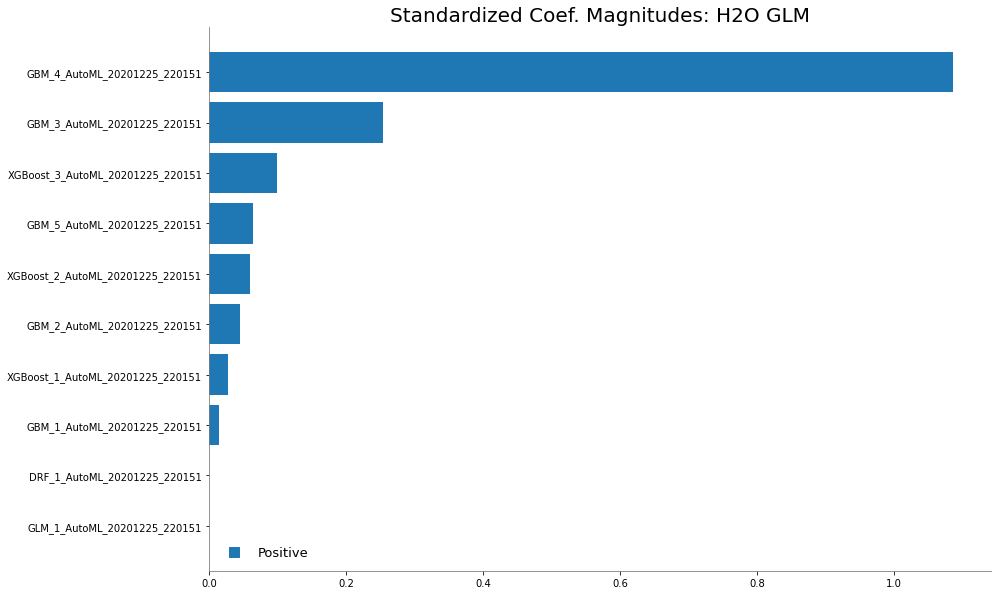

In [180]:
%matplotlib inline
metalearner.std_coef_plot()

Save Leader Model
There are two ways to save the leader model -- binary format and MOJO format. If you're taking your leader model to production, then we'd suggest the MOJO format since it's optimized for production use.

In [181]:
h2o.save_model(aml.leader, path = "./product_backorders_model_bin")

'/content/product_backorders_model_bin/StackedEnsemble_AllModels_AutoML_20201225_220151'

In [182]:
aml.leader.download_mojo(path = "./")

'/content/StackedEnsemble_AllModels_AutoML_20201225_220151.zip'